In [1]:
from qiskit.circuit import QuantumCircuit, Parameter
from iqcc_cloud_client import IQCC_Cloud
from qiskit_qm_provider import FluxTunableTransmonBackend, InputType, QMSamplerV2, QMSamplerOptions, IQCCProvider
from qiskit import transpile
from qiskit_qm_provider.backend.backend_utils import add_basic_macros_to_machine
import numpy as np
from pathlib import Path
import json

backend_name = "arbel"
provider = IQCCProvider()
machine = provider.get_machine(backend_name)

add_basic_macros_to_machine(machine)
backend = provider.get_backend(machine)



2025-11-29 19:05:12,699 - qm - INFO     - Starting session: 8d45cebe-e05e-492d-8f07-95f906c840f2


/Users/arthurostrauss/Library/CloudStorage/OneDrive-QMMachinesLTD/GitHub/qiskit-qm-provider/qiskit_qm_provider/backend/flux_tunable_transmon_backend.py:56: UserWarning: qiskit.pulse is not available, channel mapping will not be set.
  warnings.warn("qiskit.pulse is not available, channel mapping will not be set.")


In [13]:
qc = QuantumCircuit(1)
param = Parameter("param")
qc.rx(param, 0)
qc.measure_all()

param_values = np.linspace(0, np.pi, 100)
transpiled_circuits = transpile(qc, backend)

In [14]:
sampler = QMSamplerV2(backend, options=QMSamplerOptions(input_type="INPUT_STREAM"))
job = sampler.run([(transpiled_circuits, param_values)])
result = job.result()
print(result)

2025-11-29 19:08:10,878 - qm - WARNING  - Could not generate a loaded config. Maybe there is no `QuantumMachinesManager` instance?
[19:08:13] QUA program submitted to arbel (id = f4fd50a3-a55f-4a75-bc1f-6651b28c7daa)              ]8;id=995148;file:///Users/arthurostrauss/Documents/.venv/lib/python3.13/site-packages/iqcc_cloud_client/computers.py\computers.py]8;;\:]8;id=224095;file:///Users/arthurostrauss/Documents/.venv/lib/python3.13/site-packages/iqcc_cloud_client/computers.py#385\385]8;;\
[19:08:14] Execution started                                                                       ]8;id=569015;file:///Users/arthurostrauss/Documents/.venv/lib/python3.13/site-packages/iqcc_cloud_client/computers.py\computers.py]8;;\:]8;id=968624;file:///Users/arthurostrauss/Documents/.venv/lib/python3.13/site-packages/iqcc_cloud_client/computers.py#399\399]8;;\
[19:08:20] Execution finished                                                                      ]8;id=460027;file:///

KeyError: 'meas_0'

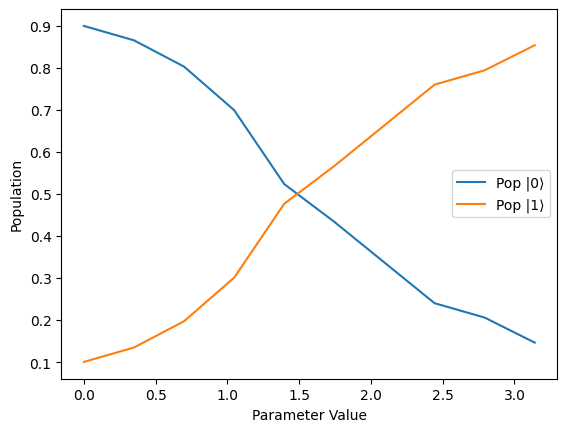

In [12]:
import matplotlib.pyplot as plt

param_values = np.linspace(0, np.pi, 10)

pop0 = []
pop1 = []
for i in range(len(param_values)):
    counts = result[0].data.meas.get_counts(i)  # get_counts returns dict like {'0': ..., '1': ...}
    shots = sum(counts.values())
    pop0.append(counts.get('0', 0) / shots)
    pop1.append(counts.get('1', 0) / shots)

plt.plot(param_values, pop0, label='Pop |0⟩')
plt.plot(param_values, pop1, label='Pop |1⟩')
plt.xlabel('Parameter Value')
plt.ylabel('Population')
plt.legend()
plt.show()

In [ ]:
from iqcc_cloud_client import IQCC_Cloud

In [21]:
job.qm_job.result_handles._results_dict

{'__qpu_execution_time_seconds': 0,
 '__sync_hook': {'stdout': '',
  'stderr': 'Traceback (most recent call last):\n  File "/app/sync_hook.py", line 2, in <module>\n    from qiskit_qm_provider.parameter_table import ParameterTable, InputType, Parameter as QMParameter, Direction\n  File "/app/.venv/lib/python3.12/site-packages/qiskit_qm_provider/__init__.py", line 7, in <module>\n    from .providers.iqcc_cloud_provider import IQCCProvider\n  File "/app/.venv/lib/python3.12/site-packages/qiskit_qm_provider/providers/__init__.py", line 1, in <module>\n    from .iqcc_cloud_provider import IQCCProvider\n  File "/app/.venv/lib/python3.12/site-packages/qiskit_qm_provider/providers/iqcc_cloud_provider.py", line 5, in <module>\n    from iqcc_cloud_client import IQCC_Cloud\nImportError: cannot import name \'IQCC_Cloud\' from \'iqcc_cloud_client\' (/app/iqcc_cloud_client/__init__.py)\n'},
 '__total_python_runtime_seconds': 4.19087815284729,
 '__fridge_info': {'MCX_flange': {'temperature_kelvin': 

In [22]:
from qiskit.primitives.containers import BitArray
BitArray.from_samples(np.array(job.qm_job.result_handles.get("meas_0").fetch_all()).flatten().tolist(), 1).reshape(10,1024)

KeyError: 'meas_0'